In [696]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import plotly.express as px

In [697]:
df = pd.read_excel('Task_5.0_2_version.xlsx')

In [698]:
df

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588
...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471
2397,Яковлев Д. И.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,18783.000000
2398,Яковлев Д. И.,2009-11-01,Подручный вальцовщика,4,Прошивной стан,18,1020,20337.300000


In [699]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FIO                 2400 non-null   object        
 1   Месяц               2400 non-null   datetime64[ns]
 2   Профессия           2400 non-null   object        
 3   Разряд              2400 non-null   int64         
 4   Оборудование        2400 non-null   object        
 5   Вредность (балл.)   2400 non-null   int64         
 6   Объем производства  2400 non-null   int64         
 7   Доход               2400 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 150.1+ KB


In [700]:
df.describe()

,Разряд,Вредность (балл.),Объем производства,Доход
count,2400.000000,2400.000000,2400.000000,2400.000000
mean,4.900000,15.785000,988.333333,21665.570570
std,1.371417,6.567857,230.982220,4686.885527
min,3.000000,0.000000,580.000000,12180.000000
25%,4.000000,14.750000,805.000000,18076.500000
50%,5.000000,18.000000,985.000000,21057.300000
75%,6.000000,19.000000,1185.000000,25105.764706
max,7.000000,22.000000,1400.000000,36076.764706


In [701]:
df.duplicated().value_counts()# проверяем есть ли дупликаты в базе данных

False    2400
dtype: int64

In [702]:
df['Профессия'].value_counts() # проверяем название и кол-во профессий по всему множеству данных

Вальцовщик                              612
Нагревальщик металла                    504
Подручный вальцовщика                   360
Оператор поста управления               324
Уборщик                                 252
Контролер качества готовой продукции    108
Посадчик металла                         96
Резчик горячего металла                  84
Огнеупорщик                              60
Name: Профессия, dtype: int64

In [703]:
df_cleaners = df[df['Профессия'] == 'Уборщик'] # создаем выбору с фильтром по профессии 'уборщик'

In [704]:
df_cleaners.describe()

,Разряд,Вредность (балл.),Объем производства,Доход
count,252.0,252.000000,252.000000,252.000000
mean,3.0,10.285714,988.333333,15559.387395
std,0.0,8.925417,231.393664,2115.535565
min,3.0,0.000000,580.000000,12180.000000
25%,3.0,0.000000,805.000000,13827.882353
50%,3.0,18.000000,985.000000,15420.000000
75%,3.0,18.000000,1185.000000,17067.882353
max,3.0,18.000000,1400.000000,20972.647059


In [705]:
df_cleaners

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588
...,...,...,...,...,...,...,...,...
2299,Чернышев Д. В.,2009-08-01,Уборщик,3,Вспомогательные помещения,0,1180,14544.352941
2300,Чернышев Д. В.,2009-09-01,Уборщик,3,Вспомогательные помещения,0,1080,13827.882353
2301,Чернышев Д. В.,2009-10-01,Уборщик,3,Вспомогательные помещения,0,780,12180.000000
2302,Чернышев Д. В.,2009-11-01,Уборщик,3,Вспомогательные помещения,0,1020,13398.000000


In [706]:
# убедились что от обородувание зависит вредность
df_cleaners.groupby('Оборудование')['Вредность (балл.)'].mean()

Оборудование
Вспомогательные помещения     0
Пилигримовые станы           18
Name: Вредность (балл.), dtype: int64

In [707]:
df_cleaners.sort_values(by ="Объем производства" )

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000
1680,Потапов М. И.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,15420.000000
384,Воронов Р. И.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,15420.000000
1752,Самсонов К. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,15420.000000
1596,Павловский Д. А.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16029.000000
...,...,...,...,...,...,...,...,...
1986,Сорокин М. А.,2009-07-01,Уборщик,3,Пилигримовые станы,18,1400,19360.588235
918,Кондратьев Д. Д.,2009-07-01,Уборщик,3,Вспомогательные помещения,0,1400,16926.617647
2010,Степанов А. М.,2009-07-01,Уборщик,3,Вспомогательные помещения,0,1400,16926.617647
1218,Львов А. С.,2009-07-01,Уборщик,3,Вспомогательные помещения,0,1400,16120.588235


In [708]:
fig = px.line(df_cleaners.sort_values(by ="Объем производства" ), x="Объем производства", y="Доход", color='Оборудование')
fig.show()

Из графика видно что за один тот же обЪем и вредность пролучают разный уровень доходов.
Предположим, что на доход влияет выслуга лет(инд.над.) или кол-во дней в месяце(это пока опустим), поэтому возвращаем FIO
Также замечаем что доходы начинают расти с объемов производства 950 независимо от уровня вредности

In [709]:
df_cleaners = df[df['Профессия'] == 'Уборщик'] # создаем выбору с фильтром по профессии 'уборщик'

In [710]:
df_cleaners

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588
...,...,...,...,...,...,...,...,...
2299,Чернышев Д. В.,2009-08-01,Уборщик,3,Вспомогательные помещения,0,1180,14544.352941
2300,Чернышев Д. В.,2009-09-01,Уборщик,3,Вспомогательные помещения,0,1080,13827.882353
2301,Чернышев Д. В.,2009-10-01,Уборщик,3,Вспомогательные помещения,0,780,12180.000000
2302,Чернышев Д. В.,2009-11-01,Уборщик,3,Вспомогательные помещения,0,1020,13398.000000


In [711]:
# рисуем интерактивную таблицу по уборщикам
fig = px.line(df_cleaners.sort_values(by ="Объем производства" ), x="Объем производства", y="Доход", color='FIO')
fig.show()

#### Замечаем, что график изменения доходв состоит из нескольких линейных функций

In [712]:
df_piligrim = df_cleaners[df_cleaners['Оборудование'] == 'Пилигримовые станы'] # сделаем выборку по Пилигримовым станам

In [713]:
fig = px.line(df_piligrim.sort_values(by ="Объем производства" ), x="Объем производства", y="Доход", color='FIO') 
fig.show()# строим график с разрезам по фамилиям

#### Делаем вывод что есть 3 вида оклада которые не зависят от объема производста,
#### полсе 820(об.произв.) график доходов начинает линейный рост
#### Предположим что с 820 до 1400 одна линейная функция

In [714]:
#Решим систему уравнений y =kx +b по конктретному работнику
df_Alexandrov = df_piligrim[df_piligrim.FIO == 'Александров А. М.']
# создаем две точки на графике
y = df_Alexandrov[df_Alexandrov['Объем производства'] == 820]['Доход'].iloc[0]
x = 820.0
y1 = df_Alexandrov[df_Alexandrov['Объем производства'] == 950]['Доход'].iloc[0]
x1 = 950.0
# решаем систему уравнений находим k и b
# y = k*x + b
# y1 = k*x1 + b
 
#b = y-k*x  подставляем во 2-е уравнение
# y1 = k*x1 + y-k*x
k = (y1-y)/(x1-x)
b = y-k*x 
print(f'k= {k}, b = {b}')

k= 5.511312217194609, b = 10900.72398190042


In [715]:
# проверим линейную функций
y = k*1020 + b
print(f'{y} не равняется следующему значению дохода')

16522.26244343892 не равняется следующему значению дохода


In [716]:
# предположим что с 950 начинается другой линейный график
# создаем две точки на графике
y = df_Alexandrov[df_Alexandrov['Объем производства'] == 950]['Доход'].iloc[0]
x = 950.0
y1 = df_Alexandrov[df_Alexandrov['Объем производства'] == 1020]['Доход'].iloc[0]
x1 = 1020.0
# решаем систему уравнений находим k и b
# y = k*x + b
# y1 = k*x1 + b
 
#b = y-k*x  подставляем во 2-е уравнение
# y1 = k*x1 + y-k*x
k = (y1-y)/(x1-x)
b = y-k*x 
print(f'k= {k}, b = {b}')

k= 7.1647058823528695, b = 9330.000000000073


In [717]:
# проверим линейную функций

y = k*1400 + b
print(f'{y} равняется последнему значению дохода, значит линейное уравнение построено верно')


19360.58823529409 равняется последнему значению дохода, значит линейное уравнение построено верно


In [718]:
# найдем b для другим уборщиков
df_Abramov = df_piligrim[df_piligrim.FIO == 'Абрамов Е. Д.']
y = df_Abramov[df_Abramov['Объем производства'] == 950]['Доход'].iloc[0]
x = 950.0
#b = y -kx
b = y-k*x
print(b)

10619.647058823573


In [719]:
#предположим что коофициент k меняться не будет с 950 для любого уборщика
# проверим функцию
y = k*1400 + b
print(y)

20650.235294117592


#### Гипотеза не подтвердилась.
#### Предполагаем что для каждого человека будет свой коофициент k,b

In [720]:
df_vspomog = df_cleaners[df_cleaners['Оборудование'] == 'Вспомогательные помещения']
df_vspomog

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
468,Григорьев А. Т.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.000000
469,Григорьев А. Т.,2009-02-01,Уборщик,3,Вспомогательные помещения,0,790,12180.000000
470,Григорьев А. Т.,2009-03-01,Уборщик,3,Вспомогательные помещения,0,820,12180.000000
471,Григорьев А. Т.,2009-04-01,Уборщик,3,Вспомогательные помещения,0,1200,14687.647059
472,Григорьев А. Т.,2009-05-01,Уборщик,3,Вспомогательные помещения,0,1250,15045.882353
...,...,...,...,...,...,...,...,...
2299,Чернышев Д. В.,2009-08-01,Уборщик,3,Вспомогательные помещения,0,1180,14544.352941
2300,Чернышев Д. В.,2009-09-01,Уборщик,3,Вспомогательные помещения,0,1080,13827.882353
2301,Чернышев Д. В.,2009-10-01,Уборщик,3,Вспомогательные помещения,0,780,12180.000000
2302,Чернышев Д. В.,2009-11-01,Уборщик,3,Вспомогательные помещения,0,1020,13398.000000


In [721]:
fig = px.line(df_vspomog.sort_values(by ="Объем производства" ), x="Объем производства", y="Доход", color='FIO')
fig.show()

In [722]:
fig = px.line(df.sort_values(by ="Объем производства" ), x="Объем производства", y="Доход", color='FIO')
fig.show()

#### из выше указанного графика можно сказать, что график росто дохода можно разделить на 3 участака 0 - 820 (где доход постоянен)
#### в промежутке 820-950 нет значений дохода поэтому будем рассматривать  950 - более где изменение характеризуется линейной функцией

In [723]:
#узучим отрезок 820-950
df_820 = df[df['Объем производства'] <= 820].copy()

In [724]:
df_820['Вредность (балл.)'].value_counts()

18    465
22    250
8     135
0      90
16     35
11     25
Name: Вредность (балл.), dtype: int64

In [725]:
df_820['Оборудование'].value_counts()

Пилигримовые станы                     295
Нагревательные печи                    190
Калибровочный стан                     155
Прошивной стан                         155
Нагревательные печи, нагрев             45
Контрольно-измерительная аппаратура     45
Вспомогательные помещения               45
Нагревательные печи, кантовка           40
Калибровочный стан, ГРП                 30
Name: Оборудование, dtype: int64

In [726]:
df_820_cleaners = df_820[df['Профессия'] == 'Уборщик']

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [727]:
# предположим что за каждый бал вредности добавляется нейкая сумма денег к основному окладу
print(df_820_cleaners[df_820_cleaners['Вредность (балл.)'] == 18]['Доход'].min())
print(f'Будет являться минимальным окладом для уборщиков {df_820_cleaners[df_820_cleaners["Вредность (балл.)"] == 0]["Доход"].min()}')

15420.0
Будет являться минимальным окладом для уборщиков 12180.0


In [728]:
# находим сколько может стоить один бал
(df_820_cleaners[df_820_cleaners['Вредность (балл.)'] == 18]['Доход'].min() -
df_820_cleaners[df_820_cleaners['Вредность (балл.)'] == 0]['Доход'].min())/18
print(bal)

180


In [729]:
(df_820_cleaners[df_820_cleaners['Вредность (балл.)'] == 18]['Доход'].max() -
df_820_cleaners[df_820_cleaners['Вредность (балл.)'] == 0]['Доход'].max())/18
print(bal)

180


In [730]:
# создадим показатель оклад вычитанием, предположив что
bal = 180
df_820['Оклад+инд.'] = df_820['Доход']-df_820['Вредность (балл.)']*bal

In [731]:
df_820

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Оклад+инд.
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.0,13398.0
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.0,13398.0
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.0,13398.0
9,Абрамов Е. Д.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16638.0,13398.0
11,Абрамов Е. Д.,2009-12-01,Уборщик,3,Пилигримовые станы,18,810,16638.0,13398.0
...,...,...,...,...,...,...,...,...,...
2388,Яковлев Д. И.,2009-01-01,Подручный вальцовщика,4,Прошивной стан,18,580,18783.0,15543.0
2389,Яковлев Д. И.,2009-02-01,Подручный вальцовщика,4,Прошивной стан,18,790,18783.0,15543.0
2390,Яковлев Д. И.,2009-03-01,Подручный вальцовщика,4,Прошивной стан,18,820,18783.0,15543.0
2397,Яковлев Д. И.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,18783.0,15543.0


In [732]:
# создаем показатель с чистым окладом путем нахождения минимального значение из профессии
df_820['чист.оклад'] = df_820.groupby('Профессия')['Оклад+инд.'].transform(np.min)

In [733]:
# находим индивидуальную надбавку
df_820['инд.над.'] = df_820['Оклад+инд.'] - df_820['чист.оклад']

In [734]:
df_820.drop(columns = ['Оклад+инд.'], inplace = True)

In [735]:
# проверяем наши вычиления
(df_820['Доход'] == (df_820['Вредность (балл.)']*bal + df_820['чист.оклад']+ df_820['инд.над.'])).value_counts()

True    1000
dtype: int64

In [778]:
# создадим датафрейм с уникальными фомилиями для слияния с основным датафреймом
df_820_uniq_FIO = df_820[['FIO', 'чист.оклад', 'инд.над.']].drop_duplicates(subset=['FIO'])

In [779]:
df_820.sample(8)

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,чист.оклад,инд.над.
1741,Русанов Т. И.,2009-02-01,Нагревальщик металла,5,"Нагревательные печи, нагрев",22,790,21169.5,14130.0,3079.5
828,Козлов Г. И.,2009-01-01,Вальцовщик,6,Пилигримовые станы,18,580,23211.0,16390.0,3581.0
263,Вдовин И. К.,2009-12-01,Оператор поста управления,5,"Калибровочный стан, ГРП",8,810,19469.0,14130.0,3899.0
541,Егоров Г. И.,2009-02-01,Посадчик металла,4,Нагревательные печи,22,790,18090.0,14130.0,0.0
2150,Федотов М. М.,2009-03-01,Уборщик,3,Вспомогательные помещения,0,820,13398.0,12180.0,1218.0
938,Копылов А. А.,2009-03-01,Вальцовщик,6,Прошивной стан,18,820,22260.0,16390.0,2630.0
1848,Синицын А. Е.,2009-01-01,Вальцовщик,6,Пилигримовые станы,18,580,24162.0,16390.0,4532.0
849,Колосов В. М.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,17370.0,12180.0,1950.0


In [780]:
#объеденим 2 дата фрейма
df_m = df.merge(df_820_uniq_FIO, on ='FIO', how = 'left')

In [861]:
df_m['премия'] = df_m['Доход']-(df_m['Вредность (балл.)']*bal)-df_m['чист.оклад']-df_m['инд.над.']
df_m

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,чист.оклад,инд.над.,премия
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000,12180.0,1218.0,0.000000
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000,12180.0,1218.0,0.000000
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000,12180.0,1218.0,0.000000
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,12180.0,1218.0,2758.411765
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,12180.0,1218.0,3152.470588
...,...,...,...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588,12180.0,3363.0,3017.170588
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471,12180.0,3363.0,2102.876471
2397,Яковлев Д. И.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,18783.000000,12180.0,3363.0,0.000000
2398,Яковлев Д. И.,2009-11-01,Подручный вальцовщика,4,Прошивной стан,18,1020,20337.300000,12180.0,3363.0,1554.300000


In [863]:
#Аналогично делаем с остальным отрезком 950 и более
df_1400_equal = df_m [df_m ['Объем производства'] == 1400][['FIO','Объем производства','премия']]
#переименуем столбцы
df_1400_equal=df_1400_equal.rename(columns = {'Объем производства': 'Объем производства_2', 'премия': 'премия_2'})
df_950_equal = df_m[df_m['Объем производства'] == 950][['FIO','Объем производства','премия']]
df_1400_equal=df_1400_equal[['FIO','Объем производства_2','премия_2']]
df_950_equal=df_950_equal[['FIO','Объем производства','премия']]

In [864]:
df_950_1400_m = df_950_equal.merge(df_1400_equal, left_on ='FIO', right_on='FIO', how = 'inner')

In [865]:
df_950_1400_m

,FIO,Объем производства,премия,Объем производства_2,премия_2
0,Абрамов Е. Д.,950,788.117647,1400,4334.647059
1,Абрамов Ф. М.,950,752.294118,1400,4137.617647
2,Агафонов С. И.,950,1118.823529,1400,6153.529412
3,Аксенов Е. Н.,950,1297.647059,1400,7137.058824
4,Александров А. М.,950,716.470588,1400,3940.588235
...,...,...,...,...,...
195,Шестаков Е. А.,950,716.470588,1400,3940.588235
196,Щербаков А. Е.,950,872.735294,1400,4800.044118
197,Щербаков А. М.,950,964.117647,1400,5302.647059
198,Щукин К. С.,950,1012.323529,1400,5567.779412


In [868]:
#находим коофицинт k для отрезка 950_1400
df_950_1400_m['k'] = (df_950_1400_m['премия_2'] - df_950_1400_m['премия'])/(df_950_1400_m['Объем производства_2'] 
                                                                         - df_950_1400_m['Объем производства'])
#находим коофицинт b для отрезка 950_1400
df_950_1400_m['b'] =df_950_1400_m['премия']-(df_950_1400_m['k']*df_950_1400_m['Объем производства'])

In [869]:
df_950_1400_m

,FIO,Объем производства,премия,Объем производства_2,премия_2,k,b
0,Абрамов Е. Д.,950,788.117647,1400,4334.647059,7.881176,-6699.00
1,Абрамов Ф. М.,950,752.294118,1400,4137.617647,7.522941,-6394.50
2,Агафонов С. И.,950,1118.823529,1400,6153.529412,11.188235,-9510.00
3,Аксенов Е. Н.,950,1297.647059,1400,7137.058824,12.976471,-11030.00
4,Александров А. М.,950,716.470588,1400,3940.588235,7.164706,-6090.00
...,...,...,...,...,...,...,...
195,Шестаков Е. А.,950,716.470588,1400,3940.588235,7.164706,-6090.00
196,Щербаков А. Е.,950,872.735294,1400,4800.044118,8.727353,-7418.25
197,Щербаков А. М.,950,964.117647,1400,5302.647059,9.641176,-8195.00
198,Щукин К. С.,950,1012.323529,1400,5567.779412,10.123235,-8604.75


Объеденим все таблицы, чтобы получить все необходимы показатели и коофициенты в одной таблице

In [870]:
df2 = df_950_1400_m[['FIO','k','b']]

In [871]:
df_final = df_m.merge(df2, left_on = 'FIO', right_on = 'FIO', how = 'inner') # объединяем с остальной таблицей, которая
#содержит надбавки

In [872]:
df_final

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,чист.оклад,инд.над.,премия,k,b
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,12180.0,1218.0,2758.411765,7.881176,-6699.0
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,12180.0,1218.0,3152.470588,7.881176,-6699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588,12180.0,3363.0,3017.170588,9.142941,-7771.5
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471,12180.0,3363.0,2102.876471,9.142941,-7771.5
2397,Яковлев Д. И.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,18783.000000,12180.0,3363.0,0.000000,9.142941,-7771.5
2398,Яковлев Д. И.,2009-11-01,Подручный вальцовщика,4,Прошивной стан,18,1020,20337.300000,12180.0,3363.0,1554.300000,9.142941,-7771.5


In [873]:
(1250*6.114706)+5020.852941

12664.235441

In [874]:
df_final_2 = df_final[df_final['Объем производства'] < 820]

In [875]:
df_final_2

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,чист.оклад,инд.над.,премия,k,b
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.0,12180.0,1218.0,0.000000e+00,7.881176,-6699.00
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.0,12180.0,1218.0,0.000000e+00,7.881176,-6699.00
9,Абрамов Е. Д.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16638.0,12180.0,1218.0,0.000000e+00,7.881176,-6699.00
11,Абрамов Е. Д.,2009-12-01,Уборщик,3,Пилигримовые станы,18,810,16638.0,12180.0,1218.0,0.000000e+00,7.881176,-6699.00
12,Абрамов Ф. М.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16029.0,12180.0,609.0,0.000000e+00,7.522941,-6394.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,Щукин К. С.,2009-12-01,Оператор поста управления,5,"Калибровочный стан, ГРП",8,810,18649.5,14130.0,3079.5,0.000000e+00,10.123235,-8604.75
2388,Яковлев Д. И.,2009-01-01,Подручный вальцовщика,4,Прошивной стан,18,580,18783.0,12180.0,3363.0,0.000000e+00,9.142941,-7771.50
2389,Яковлев Д. И.,2009-02-01,Подручный вальцовщика,4,Прошивной стан,18,790,18783.0,12180.0,3363.0,3.637979e-12,9.142941,-7771.50
2397,Яковлев Д. И.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,18783.0,12180.0,3363.0,0.000000e+00,9.142941,-7771.50


In [876]:
df_final_2['проверка'] = (df_final_2['чист.оклад']+df_final_2['инд.над.']
+(df_final_2['Вредность (балл.)']*bal)).copy()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [877]:
df_final_2['Доход']-df_final_2['проверка'] # есть различие на уровне погршености вычислений

0       0.000000e+00
1       0.000000e+00
9       0.000000e+00
11      0.000000e+00
12      0.000000e+00
            ...     
2387    0.000000e+00
2388    0.000000e+00
2389    3.637979e-12
2397    0.000000e+00
2399    0.000000e+00
Length: 800, dtype: float64

In [907]:
df_final_3 = df_final[df_final['Объем производства'] >= 950 ]
df_final_3

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,чист.оклад,инд.над.,премия,k,b
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,12180.0,1218.0,2758.411765,7.881176,-6699.0
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,12180.0,1218.0,3152.470588,7.881176,-6699.0
5,Абрамов Е. Д.,2009-06-01,Уборщик,3,Пилигримовые станы,18,950,17426.117647,12180.0,1218.0,788.117647,7.881176,-6699.0
6,Абрамов Е. Д.,2009-07-01,Уборщик,3,Пилигримовые станы,18,1400,20972.647059,12180.0,1218.0,4334.647059,7.881176,-6699.0
7,Абрамов Е. Д.,2009-08-01,Уборщик,3,Пилигримовые станы,18,1180,19238.788235,12180.0,1218.0,2600.788235,7.881176,-6699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,Яковлев Д. И.,2009-06-01,Подручный вальцовщика,4,Прошивной стан,18,950,19697.294118,12180.0,3363.0,914.294118,9.142941,-7771.5
2394,Яковлев Д. И.,2009-07-01,Подручный вальцовщика,4,Прошивной стан,18,1400,23811.617647,12180.0,3363.0,5028.617647,9.142941,-7771.5
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588,12180.0,3363.0,3017.170588,9.142941,-7771.5
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471,12180.0,3363.0,2102.876471,9.142941,-7771.5


In [908]:
df_final_3['проверка'] = (df_final_3['Объем производства']*df_final_3['k'])+df_final_3['b']+df_final_3['чист.оклад']+df_final_3['инд.над.']+(df_final_3['Вредность (балл.)']*bal)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [906]:
12180.0+1218.0+2758.411765+(18*180)

19396.411765

In [910]:
df_final_3['Доход'] - df_final_3['проверка'] # очень маленькая погрешность
# делаем вывод что наша линейная формула точно описывает размер премии

3      -7.275958e-12
4       0.000000e+00
5       0.000000e+00
6       0.000000e+00
7      -3.637979e-12
            ...     
2393    0.000000e+00
2394    0.000000e+00
2395    1.455192e-11
2396   -5.820766e-11
2398   -3.274181e-11
Length: 1400, dtype: float64

In [882]:
df_final_3

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,чист.оклад,инд.над.,премия,k,b,проверка
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,12180.0,1218.0,2758.411765,7.881176,-6699.0,2758.411765
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,12180.0,1218.0,3152.470588,7.881176,-6699.0,3152.470588
5,Абрамов Е. Д.,2009-06-01,Уборщик,3,Пилигримовые станы,18,950,17426.117647,12180.0,1218.0,788.117647,7.881176,-6699.0,788.117647
6,Абрамов Е. Д.,2009-07-01,Уборщик,3,Пилигримовые станы,18,1400,20972.647059,12180.0,1218.0,4334.647059,7.881176,-6699.0,4334.647059
7,Абрамов Е. Д.,2009-08-01,Уборщик,3,Пилигримовые станы,18,1180,19238.788235,12180.0,1218.0,2600.788235,7.881176,-6699.0,2600.788235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,Яковлев Д. И.,2009-06-01,Подручный вальцовщика,4,Прошивной стан,18,950,19697.294118,12180.0,3363.0,914.294118,9.142941,-7771.5,914.294118
2394,Яковлев Д. И.,2009-07-01,Подручный вальцовщика,4,Прошивной стан,18,1400,23811.617647,12180.0,3363.0,5028.617647,9.142941,-7771.5,5028.617647
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588,12180.0,3363.0,3017.170588,9.142941,-7771.5,3017.170588
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471,12180.0,3363.0,2102.876471,9.142941,-7771.5,2102.876471


Делаем вывод что доход ссотоит из оклада индивидуальной надбавки, надбавки за вредность.
Начиная с Объема производства 950 можно доход пропорцанально возрастает. Доход можно описать по с помощью линейной функции 
y = k*x + b как видно на итерактивном графике выше.
для описание роста заработной платы находим индивидуально для каждого работника коофициент k, который показывает интенсивность роста доходов и b, который учитывает все остальный добавки к доходу, включая(оклад, вредность, инд. надбвки)

Также можно сделать вывод что, коофициенты b,k не было необходимости на промежутоке от 820 до 950, т.к. там нет налблюдений

In [883]:
df_final[list(df_final.columns)[5::]]

,Вредность (балл.),Объем производства,Доход,чист.оклад,инд.над.,премия,k,b
0,18,580,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
1,18,790,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
2,18,820,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
3,18,1200,19396.411765,12180.0,1218.0,2758.411765,7.881176,-6699.0
4,18,1250,19790.470588,12180.0,1218.0,3152.470588,7.881176,-6699.0
...,...,...,...,...,...,...,...,...
2395,18,1180,21800.170588,12180.0,3363.0,3017.170588,9.142941,-7771.5
2396,18,1080,20885.876471,12180.0,3363.0,2102.876471,9.142941,-7771.5
2397,18,780,18783.000000,12180.0,3363.0,0.000000,9.142941,-7771.5
2398,18,1020,20337.300000,12180.0,3363.0,1554.300000,9.142941,-7771.5


In [884]:
df_final

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,чист.оклад,инд.над.,премия,k,b
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,12180.0,1218.0,2758.411765,7.881176,-6699.0
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,12180.0,1218.0,3152.470588,7.881176,-6699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588,12180.0,3363.0,3017.170588,9.142941,-7771.5
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471,12180.0,3363.0,2102.876471,9.142941,-7771.5
2397,Яковлев Д. И.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,18783.000000,12180.0,3363.0,0.000000,9.142941,-7771.5
2398,Яковлев Д. И.,2009-11-01,Подручный вальцовщика,4,Прошивной стан,18,1020,20337.300000,12180.0,3363.0,1554.300000,9.142941,-7771.5


In [851]:
corr = df_final.corr()

<AxesSubplot:>

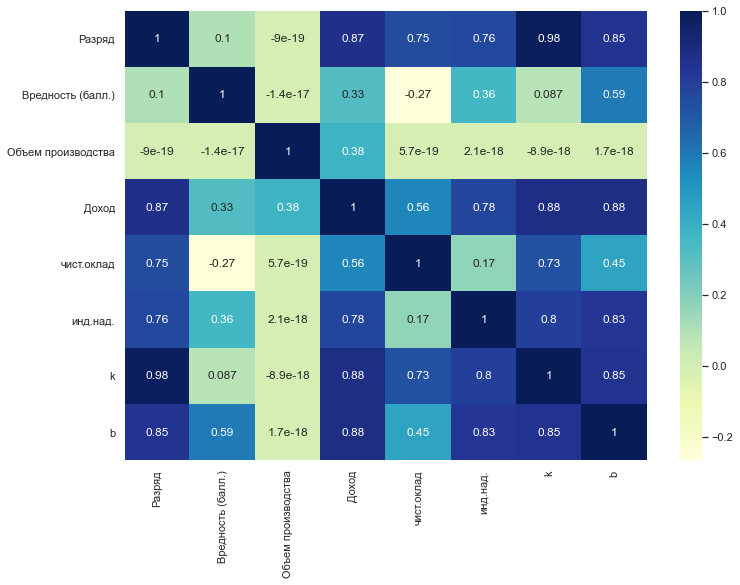

In [885]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr,annot=True,cmap="YlGnBu",annot_kws={"size": 12})


Разряд: из построенной матрицы корреляции видно, рязряд очень сильно и коррелирут с показателями дохода инд.надб. чист.
оклад, особенно на повышающие коофициенты при росте дохода

Вредность: обратная зависимость к окладу, в меньшей степени в положительную сторону коррелирует с надбавками. 
Можно сделать вывод, что на врендном производстве работают менее квалфицированные работники.
Объем произвдства с коофициентом корреляции 0,38 растет вместе с доходами.

In [886]:
df_final

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,чист.оклад,инд.над.,премия,k,b
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,12180.0,1218.0,2758.411765,7.881176,-6699.0
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,12180.0,1218.0,3152.470588,7.881176,-6699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588,12180.0,3363.0,3017.170588,9.142941,-7771.5
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471,12180.0,3363.0,2102.876471,9.142941,-7771.5
2397,Яковлев Д. И.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,18783.000000,12180.0,3363.0,0.000000,9.142941,-7771.5
2398,Яковлев Д. И.,2009-11-01,Подручный вальцовщика,4,Прошивной стан,18,1020,20337.300000,12180.0,3363.0,1554.300000,9.142941,-7771.5


In [911]:
df_final

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,чист.оклад,инд.над.,премия,k,b
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000,12180.0,1218.0,0.000000,7.881176,-6699.0
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,12180.0,1218.0,2758.411765,7.881176,-6699.0
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,12180.0,1218.0,3152.470588,7.881176,-6699.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588,12180.0,3363.0,3017.170588,9.142941,-7771.5
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471,12180.0,3363.0,2102.876471,9.142941,-7771.5
2397,Яковлев Д. И.,2009-10-01,Подручный вальцовщика,4,Прошивной стан,18,780,18783.000000,12180.0,3363.0,0.000000,9.142941,-7771.5
2398,Яковлев Д. И.,2009-11-01,Подручный вальцовщика,4,Прошивной стан,18,1020,20337.300000,12180.0,3363.0,1554.300000,9.142941,-7771.5


## Если объем производства не превышает 950
### Доход = оклад + инд.над. +(Вредность (балл.) *bal)
### bal = 180 - еденица за вредность
## Если объем производства превышает 950 расчитывается премия
### т.к. из наблюдений понятно что премия возврастает по линейной функции, поэтому мы
### легок находим  коэфициент k и b для каждого рабочего 
### премия = k*x +b
### Доход  = оклад + инд.над. +(Вредность (балл.) *bal) + k*x +b